In [129]:
import time,os
from bs4 import BeautifulSoup as bs
import html
import requests
import csv
import urllib
from urllib.request import urlopen
from itertools import zip_longest
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import seaborn as sns
import http
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV
from math import radians, cos, sin, asin, sqrt
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np
%matplotlib inline


In [2]:
#path = "C:\\Users\\New\\desktop"
#file = open(path+"CarsData.csv","w")
#header = "cars_Name, cars_Price,cars_brand,cars_location,car_walk,car_counter,car_version\n"
#file.write(header)

In [3]:
web = requests.get("https://ksa.motory.com/en/cars-for-sale/?page=1")
src = web.content
soup = bs(src,"lxml")
car_info =soup.find_all("div",{"class":"col-md-12 vehicles-used-listing-item-inner vehicles-new-listing-item-inner d-md-flex"})

In [4]:
page = 1
list_car = []
list_price = []
list_brand=[]
list_location=[]
list_walk=[]
list_counter =[]
list_version=[]

while page != 75:
    url = f"https://ksa.motory.com/en/cars-for-sale/?page={page}"
    for container in car_info:
        for car_name in soup.find_all("a",{"class":"text ellipsis"}):
            list_car.append(car_name.text.strip())
            
        for car_price in soup.find_all("div",{"class":"price-container-value"}):
            list_price.append(car_price.text.strip())
            
        for car_brand in soup.find_all("div",{"class":"col-md-auto d-md-flex d-none icon makes align-items-center"}):
            list_brand.append(car_brand.text.strip())
            
        for car_location in soup.find_all("a",{"class":"col-md-auto col-12 icon city fas fa-map-marker-alt"}):
            list_location.append(car_location.text.strip())
            
        for car_walk in soup.find_all("div",{"class":"col-md-auto col-12 icon mileage fa fa-road d-flex"}):
            list_walk.append(car_walk.text.strip())
            
        for car_counter in soup.find_all("div",{"class":"col-md-auto col-auto icon transmission fa fa-cogs"}):
            list_counter.append(car_counter.text.strip())
            
        for car_version in soup.find_all("a",{"class":"col-md-auto col-12 icon year far fa-calendar d-flex"}):
            list_version.append(car_version.text.strip())
            

    page = page + 1


In [6]:
#len(car_name)

In [7]:
dictionary={'car_name': list_car , 'car_price':list_price,'car_brand': list_brand,'car_location': list_location,
            'car_walk':list_walk ,'car_version':list_version}
dictionary

{'car_name': ['Toyota Camry 2019',
  'Dodge Charger 2019',
  'Hyundai County 2018',
  'Chevrolet Tahoe LS 2018',
  'Chevrolet Tahoe LS 2018',
  'Toyota Avanza STD 2021',
  'Nissan Sunny 2020',
  'Toyota Prado 2020',
  'Toyota Prado 2020',
  'Toyota Prado 2020',
  'Toyota Prado 2020',
  'Toyota Prado 2020',
  'Toyota Camry 2019',
  'Toyota Corolla 2018',
  'Toyota Corolla 2019',
  'Toyota Corolla 2018',
  'Toyota Yaris 2019',
  'Toyota Yaris 2016',
  'Toyota Yaris 2019',
  'Nissan Kicks 2021',
  'Toyota Camry 2019',
  'Dodge Charger 2019',
  'Hyundai County 2018',
  'Chevrolet Tahoe LS 2018',
  'Chevrolet Tahoe LS 2018',
  'Toyota Avanza STD 2021',
  'Nissan Sunny 2020',
  'Toyota Prado 2020',
  'Toyota Prado 2020',
  'Toyota Prado 2020',
  'Toyota Prado 2020',
  'Toyota Prado 2020',
  'Toyota Camry 2019',
  'Toyota Corolla 2018',
  'Toyota Corolla 2019',
  'Toyota Corolla 2018',
  'Toyota Yaris 2019',
  'Toyota Yaris 2016',
  'Toyota Yaris 2019',
  'Nissan Kicks 2021',
  'Toyota Camry 

# Data frame

In [8]:
cars_df1 = pd.DataFrame(dictionary)
cars_df1

,car_name,car_price,car_brand,car_location,car_walk,car_version
0,Toyota Camry 2019,Not Specified,Toyota,Jeddah,"70,000-79,999 km",2019
1,Dodge Charger 2019,"25,000 SR",Dodge,Dammam,"100,000-119,999 km",2019
2,Hyundai County 2018,"167,785 SR",Hyundai,Riyadh,0 km,2018
3,Chevrolet Tahoe LS 2018,"134,772 SR",Chevrolet,Riyadh,"150,000-159,999 km",2018
4,Chevrolet Tahoe LS 2018,"133,870 SR",Chevrolet,Riyadh,"90,000-99,999 km",2018
...,...,...,...,...,...,...
29595,Toyota Corolla 2018,Not Specified,Toyota,Jeddah,"100,000-119,999 km",2018
29596,Toyota Yaris 2019,Not Specified,Toyota,Jeddah,"100,000-119,999 km",2019
29597,Toyota Yaris 2016,"30,475 SR",Toyota,Jeddah,"140,000-149,999 km",2016
29598,Toyota Yaris 2019,Not Specified,Toyota,Jeddah,"120,000-129,999 km",2019


In [9]:
cars_df1.to_csv("cofdata.csv")

In [10]:
cars_df1=pd.read_csv("cofdata.csv",index_col=0)
cars_df1.head(7)

,car_name,car_price,car_brand,car_location,car_walk,car_version
0,Toyota Camry 2019,Not Specified,Toyota,Jeddah,"70,000-79,999 km",2019
1,Dodge Charger 2019,"25,000 SR",Dodge,Dammam,"100,000-119,999 km",2019
2,Hyundai County 2018,"167,785 SR",Hyundai,Riyadh,0 km,2018
3,Chevrolet Tahoe LS 2018,"134,772 SR",Chevrolet,Riyadh,"150,000-159,999 km",2018
4,Chevrolet Tahoe LS 2018,"133,870 SR",Chevrolet,Riyadh,"90,000-99,999 km",2018
5,Toyota Avanza STD 2021,"63,140 SR",Toyota,Jeddah,1-500 km,2021
6,Nissan Sunny 2020,"42,804 SR",Nissan,Dammam,1-500 km,2020


In [134]:
df_c=pd.read_csv("cofdata.csv",index_col=0)
df_c.head(7)

,car_name,car_price,car_brand,car_location,car_walk,car_version
0,Toyota Camry 2019,Not Specified,Toyota,Jeddah,"70,000-79,999 km",2019
1,Dodge Charger 2019,"25,000 SR",Dodge,Dammam,"100,000-119,999 km",2019
2,Hyundai County 2018,"167,785 SR",Hyundai,Riyadh,0 km,2018
3,Chevrolet Tahoe LS 2018,"134,772 SR",Chevrolet,Riyadh,"150,000-159,999 km",2018
4,Chevrolet Tahoe LS 2018,"133,870 SR",Chevrolet,Riyadh,"90,000-99,999 km",2018
5,Toyota Avanza STD 2021,"63,140 SR",Toyota,Jeddah,1-500 km,2021
6,Nissan Sunny 2020,"42,804 SR",Nissan,Dammam,1-500 km,2020


In [13]:
cars_df1.describe() #the colunm has in type onlt

,car_version
count,29600.000000
mean,2019.100000
std,1.179003
min,2016.000000
25%,2018.000000
50%,2019.000000
75%,2020.000000
max,2021.000000


In [15]:
cars_df1.info() #need to convert the types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29600 entries, 0 to 29599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   car_name      29600 non-null  object
 1   car_price     29600 non-null  object
 2   car_brand     29600 non-null  object
 3   car_location  29600 non-null  object
 4   car_walk      29600 non-null  object
 5   car_version   29600 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


# Check the Null Value

In [16]:
cars_df1.isnull().sum()

car_name        0
car_price       0
car_brand       0
car_location    0
car_walk        0
car_version     0
dtype: int64

-

# Convert categrical column to dummy columns

In [17]:
dfbrand=pd.get_dummies(cars_df1['car_brand'])
dfbrand

,Chevrolet,Dodge,Hyundai,Nissan,Toyota
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
29595,0,0,0,0,1
29596,0,0,0,0,1
29597,0,0,0,0,1
29598,0,0,0,0,1


In [18]:
dfloc=pd.get_dummies(cars_df1['car_location'])
dfloc

,Dammam,Jeddah,Riyadh
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
29595,0,1,0
29596,0,1,0
29597,0,1,0
29598,0,1,0


In [19]:
cars_df1.head()

,car_name,car_price,car_brand,car_location,car_walk,car_version
0,Toyota Camry 2019,Not Specified,Toyota,Jeddah,"70,000-79,999 km",2019
1,Dodge Charger 2019,"25,000 SR",Dodge,Dammam,"100,000-119,999 km",2019
2,Hyundai County 2018,"167,785 SR",Hyundai,Riyadh,0 km,2018
3,Chevrolet Tahoe LS 2018,"134,772 SR",Chevrolet,Riyadh,"150,000-159,999 km",2018
4,Chevrolet Tahoe LS 2018,"133,870 SR",Chevrolet,Riyadh,"90,000-99,999 km",2018


# Add the dummy value to the DataFrame

In [27]:
#cars_df1=cars_df1.join(dfloc['Riyadh'])
#cars_df1=cars_df1.join(dfloc['Jeddah'])
#cars_df1=cars_df1.join(dfloc['Dammam'])

#cars_df1=cars_df1.join(dfbrand['Chevrolet'])
#cars_df1=cars_df1.join(dfbrand['Dodge'])
#cars_df1=cars_df1.join(dfbrand['Hyundai'])
#cars_df1=cars_df1.join(dfbrand['Nissan'])
#cars_df1=cars_df1.join(dfbrand['Toyota'])

In [28]:
cars_df1.head()

,car_name,car_price,car_brand,car_location,car_walk,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Dodge,Hyundai,Nissan,Toyota
0,Toyota Camry 2019,Not Specified,Toyota,Jeddah,"70,000-79,999 km",2019,0,1,0,0,0,0,0,1
1,Dodge Charger 2019,"25,000 SR",Dodge,Dammam,"100,000-119,999 km",2019,0,0,1,0,1,0,0,0
2,Hyundai County 2018,"167,785 SR",Hyundai,Riyadh,0 km,2018,1,0,0,0,0,1,0,0
3,Chevrolet Tahoe LS 2018,"134,772 SR",Chevrolet,Riyadh,"150,000-159,999 km",2018,1,0,0,1,0,0,0,0
4,Chevrolet Tahoe LS 2018,"133,870 SR",Chevrolet,Riyadh,"90,000-99,999 km",2018,1,0,0,1,0,0,0,0


# convert the column has value 'Not Specified' to zero value

In [29]:
cars_df1['car_price2'] = cars_df1['car_price'].apply(lambda x: 0 if x== 'Not Specified' else x.replace(',','').replace('SR', '').strip())

In [30]:
cars_df1.head()

,car_name,car_price,car_brand,car_location,car_walk,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Dodge,Hyundai,Nissan,Toyota,car_price2
0,Toyota Camry 2019,Not Specified,Toyota,Jeddah,"70,000-79,999 km",2019,0,1,0,0,0,0,0,1,0
1,Dodge Charger 2019,"25,000 SR",Dodge,Dammam,"100,000-119,999 km",2019,0,0,1,0,1,0,0,0,25000
2,Hyundai County 2018,"167,785 SR",Hyundai,Riyadh,0 km,2018,1,0,0,0,0,1,0,0,167785
3,Chevrolet Tahoe LS 2018,"134,772 SR",Chevrolet,Riyadh,"150,000-159,999 km",2018,1,0,0,1,0,0,0,0,134772
4,Chevrolet Tahoe LS 2018,"133,870 SR",Chevrolet,Riyadh,"90,000-99,999 km",2018,1,0,0,1,0,0,0,0,133870


# convert from Object type into Int type 

In [32]:
cars_df1['car_price2']=cars_df1['car_price2'].astype(int)

In [33]:
cars_df1.head()

,car_name,car_price,car_brand,car_location,car_walk,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Dodge,Hyundai,Nissan,Toyota,car_price2
0,Toyota Camry 2019,Not Specified,Toyota,Jeddah,"70,000-79,999 km",2019,0,1,0,0,0,0,0,1,0
1,Dodge Charger 2019,"25,000 SR",Dodge,Dammam,"100,000-119,999 km",2019,0,0,1,0,1,0,0,0,25000
2,Hyundai County 2018,"167,785 SR",Hyundai,Riyadh,0 km,2018,1,0,0,0,0,1,0,0,167785
3,Chevrolet Tahoe LS 2018,"134,772 SR",Chevrolet,Riyadh,"150,000-159,999 km",2018,1,0,0,1,0,0,0,0,134772
4,Chevrolet Tahoe LS 2018,"133,870 SR",Chevrolet,Riyadh,"90,000-99,999 km",2018,1,0,0,1,0,0,0,0,133870


# Check the Types of DataFrame after change the types

In [35]:
cars_df1.describe() #the colunm has in type onlt

,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Dodge,Hyundai,Nissan,Toyota,car_price2
count,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000
mean,2019.100000,0.200000,0.450000,0.350000,0.100000,0.050000,0.050000,0.100000,0.700000,67842.300000
std,1.179003,0.400007,0.497502,0.476978,0.300005,0.217949,0.217949,0.300005,0.458265,63127.438163
min,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,52972.000000
75%,2020.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,138230.000000
max,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,167785.000000


# Convert the Object Type into Int typle

In [36]:
cars_df1['car_walk1'] = cars_df1['car_walk'].apply(lambda x:  x.replace(',','').replace('km', '').strip())


In [37]:
cars_df1.head()

,car_name,car_price,car_brand,car_location,car_walk,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Dodge,Hyundai,Nissan,Toyota,car_price2,car_walk1
0,Toyota Camry 2019,Not Specified,Toyota,Jeddah,"70,000-79,999 km",2019,0,1,0,0,0,0,0,1,0,70000-79999
1,Dodge Charger 2019,"25,000 SR",Dodge,Dammam,"100,000-119,999 km",2019,0,0,1,0,1,0,0,0,25000,100000-119999
2,Hyundai County 2018,"167,785 SR",Hyundai,Riyadh,0 km,2018,1,0,0,0,0,1,0,0,167785,0
3,Chevrolet Tahoe LS 2018,"134,772 SR",Chevrolet,Riyadh,"150,000-159,999 km",2018,1,0,0,1,0,0,0,0,134772,150000-159999
4,Chevrolet Tahoe LS 2018,"133,870 SR",Chevrolet,Riyadh,"90,000-99,999 km",2018,1,0,0,1,0,0,0,0,133870,90000-99999


# New column that take the number after the - charecter .

In [48]:
cars_df1['car_walk1'] = cars_df1['car_walk'].apply(lambda x:  x.replace(',','').replace('km', '').strip())


In [49]:
cars_df1['car_walk2']=cars_df1['car_walk1'].str.split('-').str[-1]

In [50]:
cars_df1['car_walk2']=cars_df1['car_walk2'].astype(int)

In [51]:
cars_df1.head()

,car_name,car_price,car_brand,car_location,car_walk,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Dodge,Hyundai,Nissan,Toyota,car_price2,car_walk1,car_walk2
0,Toyota Camry 2019,Not Specified,Toyota,Jeddah,"70,000-79,999 km",2019,0,1,0,0,0,0,0,1,0,70000-79999,79999
1,Dodge Charger 2019,"25,000 SR",Dodge,Dammam,"100,000-119,999 km",2019,0,0,1,0,1,0,0,0,25000,100000-119999,119999
2,Hyundai County 2018,"167,785 SR",Hyundai,Riyadh,0 km,2018,1,0,0,0,0,1,0,0,167785,0,0
3,Chevrolet Tahoe LS 2018,"134,772 SR",Chevrolet,Riyadh,"150,000-159,999 km",2018,1,0,0,1,0,0,0,0,134772,150000-159999,159999
4,Chevrolet Tahoe LS 2018,"133,870 SR",Chevrolet,Riyadh,"90,000-99,999 km",2018,1,0,0,1,0,0,0,0,133870,90000-99999,99999


# Check the Types of DataFrame after change the types

In [52]:
cars_df1.describe() #the colunm has in type onlt

,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Dodge,Hyundai,Nissan,Toyota,car_price2,car_walk2
count,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000,29600.000000
mean,2019.100000,0.200000,0.450000,0.350000,0.100000,0.050000,0.050000,0.100000,0.700000,67842.300000,64674.450000
std,1.179003,0.400007,0.497502,0.476978,0.300005,0.217949,0.217949,0.300005,0.458265,63127.438163,60928.642142
min,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000
50%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,52972.000000,79999.000000
75%,2020.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,138230.000000,119999.000000
max,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,167785.000000,159999.000000


In [53]:
cars_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29600 entries, 0 to 29599
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   car_name      29600 non-null  object
 1   car_price     29600 non-null  object
 2   car_brand     29600 non-null  object
 3   car_location  29600 non-null  object
 4   car_walk      29600 non-null  object
 5   car_version   29600 non-null  int64 
 6   Riyadh        29600 non-null  uint8 
 7   Jeddah        29600 non-null  uint8 
 8   Dammam        29600 non-null  uint8 
 9   Chevrolet     29600 non-null  uint8 
 10  Dodge         29600 non-null  uint8 
 11  Hyundai       29600 non-null  uint8 
 12  Nissan        29600 non-null  uint8 
 13  Toyota        29600 non-null  uint8 
 14  car_price2    29600 non-null  int32 
 15  car_walk1     29600 non-null  object
 16  car_walk2     29600 non-null  int32 
dtypes: int32(2), int64(1), object(6), uint8(8)
memory usage: 3.5+ MB


In [54]:
cars_df1.shape

(29600, 17)

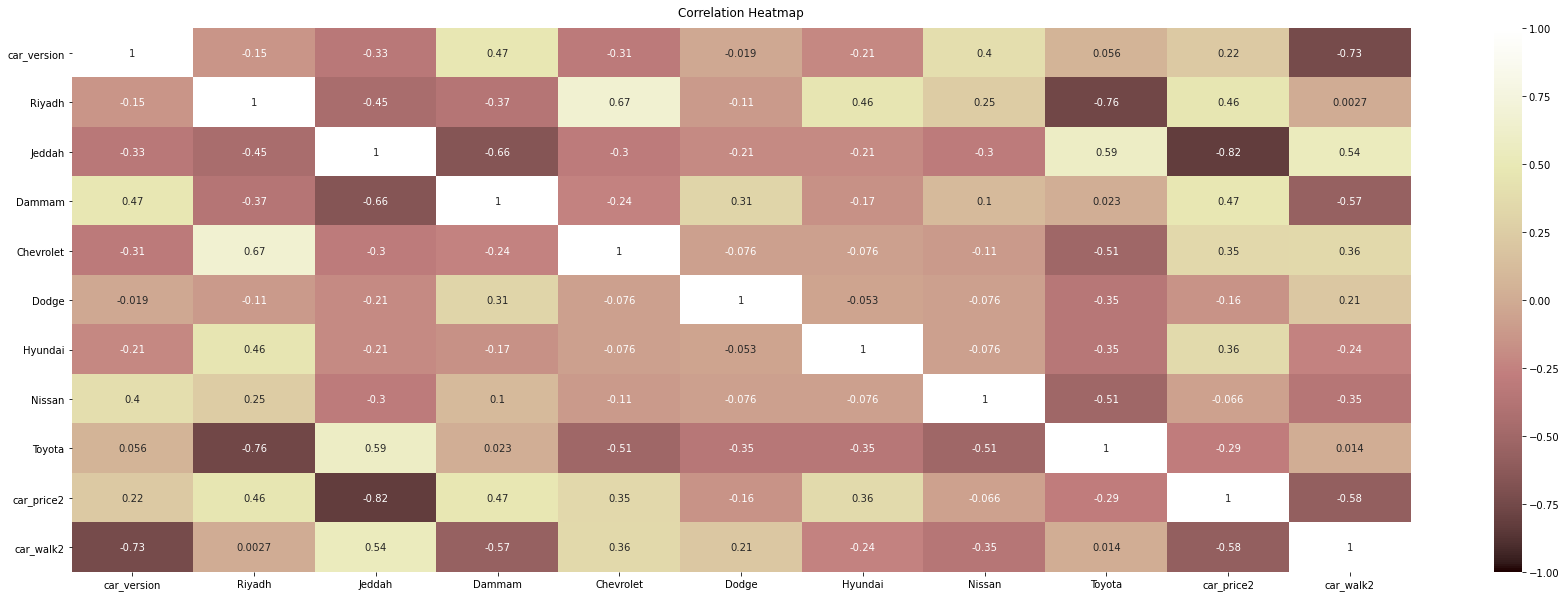

In [66]:
#corallation relatio to view high feauters 
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(cars_df1.corr(), vmin=-1, vmax=1, annot=True, cmap="pink")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()


In [133]:
cars_df1.head()

,car_name,car_price,car_brand,car_location,car_walk,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Dodge,Hyundai,Nissan,Toyota,car_price2,car_walk1,car_walk2
0,Toyota Camry 2019,Not Specified,Toyota,Jeddah,"70,000-79,999 km",2019,0,1,0,0,0,0,0,1,0,70000-79999,79999
1,Dodge Charger 2019,"25,000 SR",Dodge,Dammam,"100,000-119,999 km",2019,0,0,1,0,1,0,0,0,25000,100000-119999,119999
2,Hyundai County 2018,"167,785 SR",Hyundai,Riyadh,0 km,2018,1,0,0,0,0,1,0,0,167785,0,0
3,Chevrolet Tahoe LS 2018,"134,772 SR",Chevrolet,Riyadh,"150,000-159,999 km",2018,1,0,0,1,0,0,0,0,134772,150000-159999,159999
4,Chevrolet Tahoe LS 2018,"133,870 SR",Chevrolet,Riyadh,"90,000-99,999 km",2018,1,0,0,1,0,0,0,0,133870,90000-99999,99999


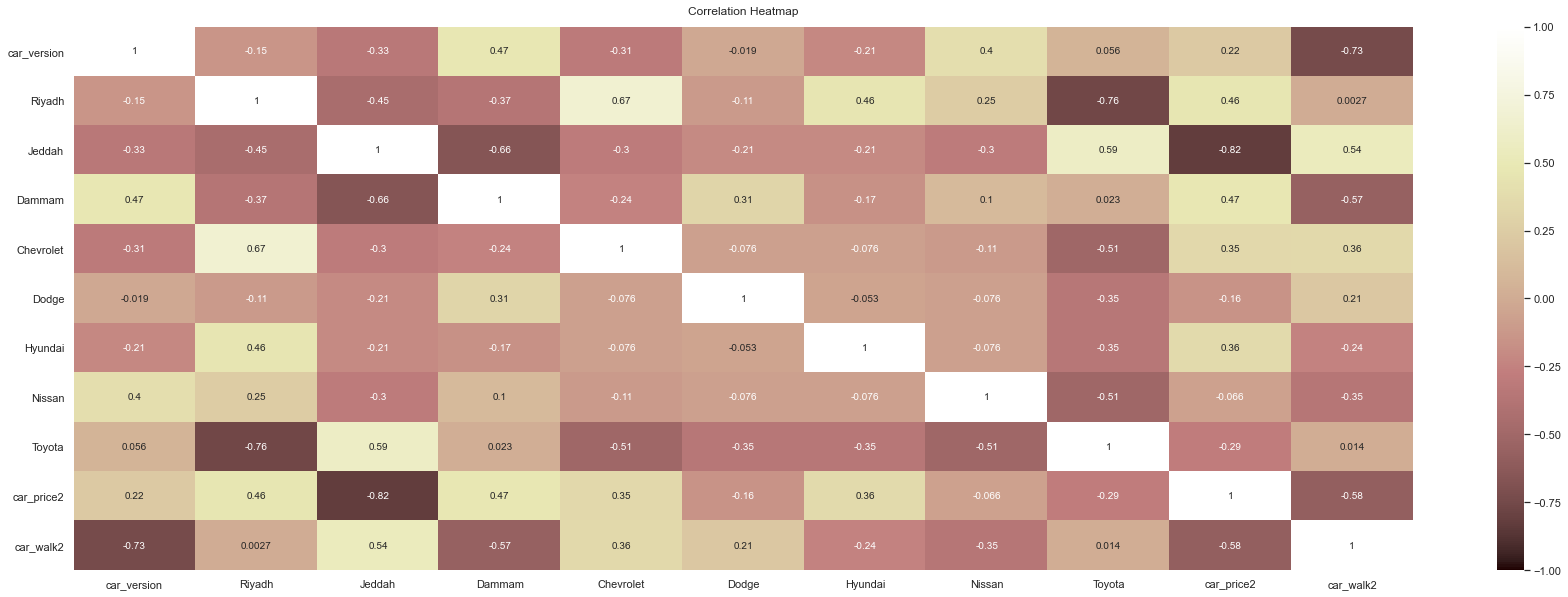

In [136]:

#corallation relatio to view high feauters 
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(cars_df1.corr(), vmin=-1, vmax=1, annot=True, cmap="pink")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

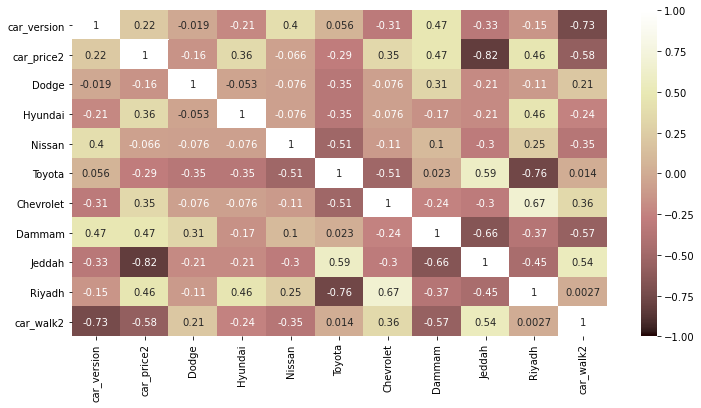

In [67]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(cars_df1[['car_version','car_price2','Dodge','Hyundai','Nissan','Toyota','Chevrolet','Dammam','Jeddah','Riyadh','car_walk2']].corr(), vmin=-1, vmax=1, annot=True,cmap='pink')
plt.show()

In [88]:
cars_df2=pd.DataFrame(cars_df1,columns=['car_version','car_price2','car_walk2'])

In [132]:
cars_df2

29600

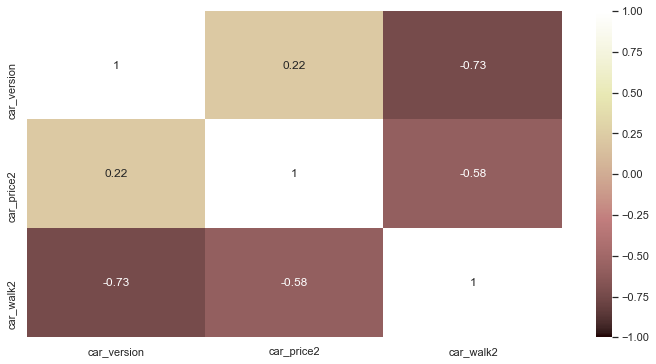

In [93]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(cars_df2[['car_version','car_price2','car_walk2']].corr(), vmin=-1, vmax=1, annot=True,cmap='pink')
plt.show()

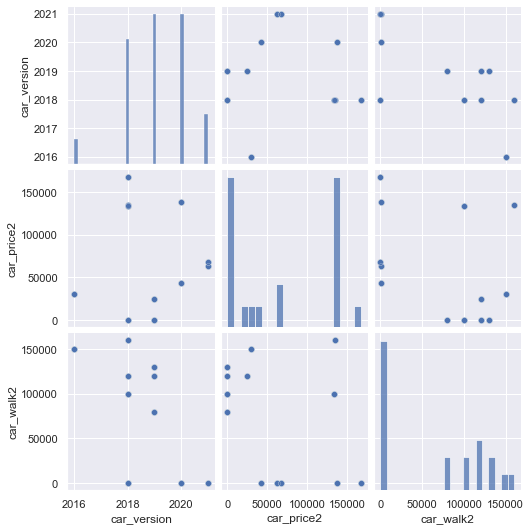

In [138]:
sns.set(style="darkgrid", color_codes=True)
sns.pairplot(cars_df2,plot_kws={'alpha':0.3})
# plt.title('Correlation by Feature',fontsize=14)



In [120]:
# 60% Train - 20% Val - 20% Test

X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.25)

In [127]:

def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_val, y_val)}')
    print("MAE:" , metrics.mean_absolute_error(y_val,model.predict(X_val)))
    print("MSE:" , metrics.mean_squared_error(y_val,model.predict(X_val)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,model.predict(X_val))))

In [130]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.43047057477992623
Val score 0.4325509645490544
MAE: 37853.48437102655
MSE: 2247757725.1515584
RMSE: 47410.52335876032


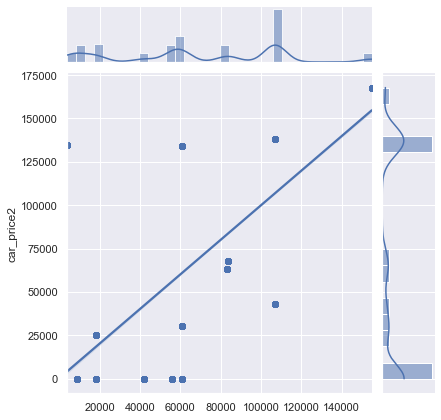

In [158]:
preds = lr.predict(X) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y, kind='reg');

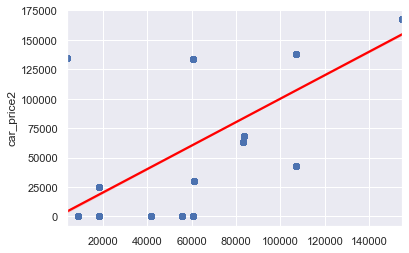

In [162]:
sns.regplot(x=preds, y=y, data=cars_df2, line_kws={'color':'red'})
plt.show()

--


In [163]:
#sns.set(style="darkgrid", color_codes=True)
#sns.pairplot(df_all,plot_kws={'alpha':0.3})
# plt.title('Correlation by Feature',fontsize=14)
#plt.savefig('charts/modelpairplot.png')





C:\Users\New\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Histogram')

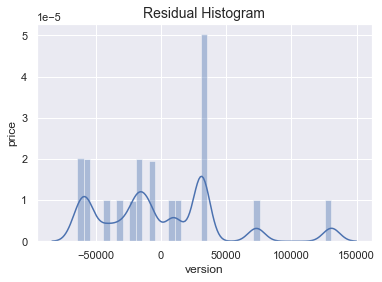

In [131]:
y_pred = lr.predict(X)

residuals = y - y_pred

sns.distplot(residuals);
plt.ylabel("price",fontsize=12)
plt.xlabel("version",fontsize=12)
plt.title('Residual Histogram',fontsize=14)



In [111]:

prediction = lr.predict(X_test)

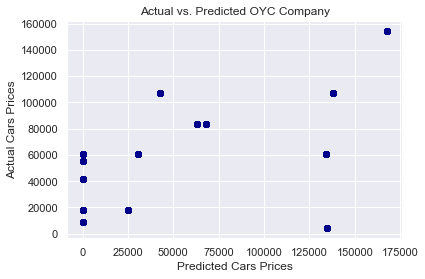

In [115]:
plt.scatter(y_test,prediction,alpha =0.2,color="DarkBlue")
plt.title('Actual vs. Predicted OYC Company')
plt.xlabel('Predicted Cars Prices')
plt.ylabel('Actual Cars Prices');

In [61]:
# Show the count of each value in car brand
cars_df1.car_brand.value_counts()

Toyota       20720
Chevrolet     2960
Nissan        2960
Dodge         1480
Hyundai       1480
Name: car_brand, dtype: int64

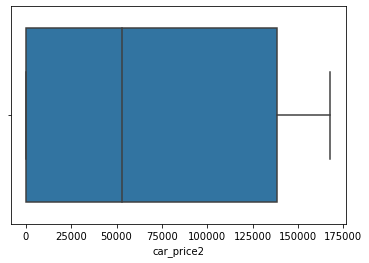

In [71]:
sns.boxplot(x = cars_df1['car_price2']);

<ipython-input-73-47d5007eba9d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x=cars_df1[cars_df1['car_price2'] >25000][cars_df1['car_price2'] < 125000]['car_price2']);


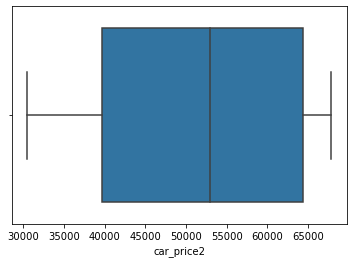

In [73]:
# Remove outliers in the car_price3 attribute
sns.boxplot(x=cars_df1[cars_df1['car_price2'] >25000][cars_df1['car_price2'] < 125000]['car_price2']);

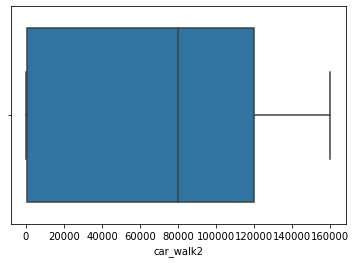

In [75]:
sns.boxplot(x = cars_df1['car_walk2']);

<ipython-input-157-71672366c9f7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x=cars_df1[cars_df1['car_walk2'] >2000][cars_df1['car_walk2'] < 160000]['car_walk2']);


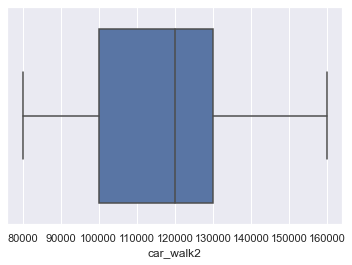

In [157]:
# Remove outliers in the car_walk attribute
sns.boxplot(x=cars_df1[cars_df1['car_walk2'] >2000][cars_df1['car_walk2'] < 160000]['car_walk2']);

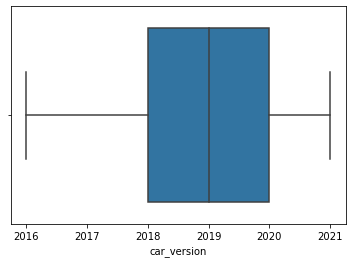

In [78]:
sns.boxplot(x = cars_df1['car_version']);

In [ ]:
df_all=cars_df1[cars_df1['car_walk2'] >0][cars_df1['car_walk2'] < 120000]['car_walk2']

# HeatMap After remove the Outliers (((( need to edite ))))

In [82]:
#sns.set(font_scale=1.4)
#plt.figure(figsize=(30,10))
#heatmap = sns.heatmap(cars_df[['car_version','car_price2','car_walk2']].corr(), vmin=-1, vmax=1, annot=True, cmap="Reds")
#heatmap.set_title('Correlation Heatmap After Removing Outliers', fontdict={'fontsize':30}, pad=20);
#plt.show()

In [83]:
#sns.pairplot(cars_df1)

# Modeling

In [ ]:
#get dummies featuers 
#dum_df= pd.get_dummies(dfa.drop(columns=['city']), columns = ['district','direction'],dtype='int64')

In [ ]:
#X = dummies_subset_nona_nodup_riyadh.drop('price',axis=1)
#X = dum_df.drop(columns=['price'])
#y = dum_df['price']
#from sklearn.model_selection import train_test_split


In [164]:
##def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''

     # perform train/val split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24) # "= \ to coinsder this line with the above one"
    
    # fit linear regression to training data
    lr_model = LinearRegression() 
    lr_model.fit(X_train, y_train)
    model=lr_model
    
    # fit Ridge regression 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_test_scaled = scaler.transform(X_test)

    lm_reg = Ridge(alpha=2)
    lm_reg.fit(X_scaled,y)


    
    # score fit model on validation data
    val_score_linear = cross_val_score(lr_model, X, y, cv = 5).mean()
    val_score_rid = cross_val_score(lm_reg, X, y, cv = 5).mean()
    
    # report results

    print(f'Linear Regression test R^2: {lr_model.score(X_test, y_test):.3f}')
    print('\nCV for Linear model score was:', val_score_linear)
#     X_poly_test = poly_reg.fit_transform(X_test)
    print(f'\nRidge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
#     print(X_poly_test)
    print('\nCV for Ridge model was score was:', val_score_rid)
#     print('Feature coefficient results: \n')
#     for feature, coef in zip(X.columns, lr_model.coef_):
#         print(feature, ':', f'{coef:.2f}') # "means 2 decimal points"

In [165]:
#after taking out outliers in area
split_and_validate(X,y)

Linear Regression test R^2: 0.437

CV for Linear model score was: 0.42800439874495544

Ridge Regression test R^2: 0.437

CV for Ridge model was score was: 0.4280044066203529


In [170]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x) # "regression prediction"

    plt.subplot(1, 3, 1)
    plt.scatter(x,y) # "scatter"
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res) # "scatter supposed to have no pattern"
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt) # "normal qq plot"
    plt.title("Normal Q-Q plot")

In [174]:
#diagnostic_plot(np.array(X['cars_price3']).reshape(-1, 1), y)

In [ ]:
lr = LinearRegression()
fit = lr.fit(X,y) # for later use

In [ ]:
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X, y) #fit model to our choice of features

In [ ]:
# extract feature coefficients and intercept from fit model
print(lm.intercept_)
print(lm.coef_)

In [ ]:
preds = lm.predict(X) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y, kind='reg')

In [ ]:
lm.score(X,y)

# Multicollinearity

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
 X = X.apply(pd.to_numeric, errors='coerce')

In [ ]:
vif = calc_vif(X[['beds','area','distance_to_kindom_tower_Km', 'street_width', 'age']])
vif

In [ ]:
X2 = X[['beds','area','distance_to_kindom_tower_Km', 'street_width', 'age']]
#after 
split_and_validate(X2,y)

In [ ]:
vif = calc_vif(X[['area','distance_to_kindom_tower_Km', 'street_width', 'age']])
vif

In [ ]:
X3 = X[['area','distance_to_kindom_tower_Km', 'street_width', 'age']]
#after 
split_and_validate(X3,y)

In [ ]:
vif = calc_vif(X[['area','distance_to_kindom_tower_Km', 'age']])
vif

In [ ]:
X4 = X[['area','distance_to_kindom_tower_Km', 'age']]

In [ ]:
#after 
split_and_validate(X4,y)

## Scaling MinMaxScaler, and StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
MinMax_scaled = scaler.fit_transform(X)
print(MinMax_scaled)

In [ ]:
#after 
split_and_validate(MinMax_scaled,y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
StandardScaler_scaled = scaler.fit_transform(X)
print(StandardScaler_scaled)

In [ ]:
#after 
split_and_validate(StandardScaler_scaled,y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder.fit_transform(dfa['district'], y)

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

In [ ]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [ ]:
X_reduced

In [ ]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [ ]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))